<a href="https://colab.research.google.com/github/kinaya18/Deep-Learning/blob/main/Week-7/Bidirectional_RNN_DeteksiSarkasme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bidirectional RNN untuk Deteksi Sarkasme**
dataset : DeteksiSarkasme.json

## **Import Library**

In [ ]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

## **1. Load dan parsing dataset JSON**

In [ ]:
data = []
with open('DeteksiSarkasme.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

In [ ]:
sentences = [item['headline'] for item in data]
labels = np.array([item['is_sarcastic'] for item in data])

## **2. Tokenisasi dan padding**

In [ ]:
vocab_size = 10000
embedding_dim = 64
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## **3. Split data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

## **4. Callbacks**

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

## **5. Model**

In [ ]:
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## **6. Training**

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[earlystop, reduce_lr]
)

Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.6759 - loss: 0.5752 - val_accuracy: 0.8564 - val_loss: 0.3308 - learning_rate: 0.0010
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9046 - loss: 0.2489 - val_accuracy: 0.8682 - val_loss: 0.3286 - learning_rate: 0.0010
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9463 - loss: 0.1550 - val_accuracy: 0.8637 - val_loss: 0.3511 - learning_rate: 0.0010
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9678 - loss: 0.1008 - val_accuracy: 0.8510 - val_loss: 0.4746 - learning_rate: 0.0010
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9839 - loss: 0.0545 - val_accuracy: 0.8495 - val_loss: 0.5715 - learning_rate: 2.0000e-04


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 128)       │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,248,133 (8.58 MB)

 Trainable params: 749,377 (2.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,498,756 (5.72 MB)

## **7. Evaluation**

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_probs)

print("\n===== Evaluation Metrics =====")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")


===== Evaluation Metrics =====
Accuracy : 0.8682
Precision: 0.8482
Recall   : 0.8525
F1 Score : 0.8503
AUC      : 0.9380


## **8. Visualisasi Akurasi dan Loss**

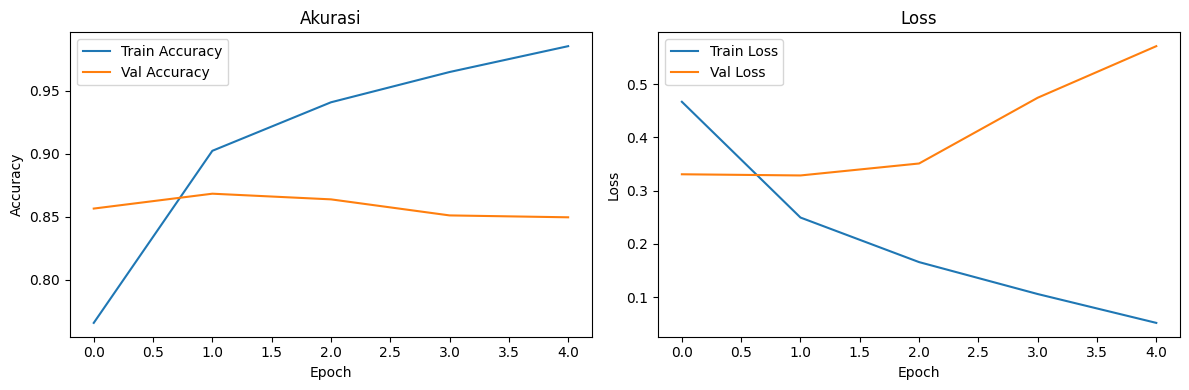

In [ ]:
plt.figure(figsize=(12, 4))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


##  **Analisis : Bidirectional RNN untuk Deteksi Sarkasme**

###  **Deskripsi**

Proyek ini bertujuan untuk membangun model deep learning menggunakan pendekatan **Bidirectional Recurrent Neural Network (BiRNN)** dengan arsitektur **Bidirectional LSTM** untuk melakukan klasifikasi teks pada dataset yang berfokus pada **deteksi sarkasme** dalam teks berita. Dataset ini berisi teks-teks headline berita, dengan label `is_sarcastic` yang menunjukkan apakah berita tersebut bersifat sarkastik atau tidak.

---

###  Arsitektur & Pemrosesan Data

Langkah-langkah utama dalam proyek ini adalah:

1. **Pra-pemrosesan Data:**

   * **Tokenisasi**: Mengubah teks berita menjadi representasi numerik menggunakan `Tokenizer` untuk memetakan kata ke dalam indeks angka.
   * **Padding**: Menyamakan panjang input dengan `pad_sequences`, memastikan setiap input teks memiliki panjang yang sama.
   * **Pembagian Data**: Data dibagi menjadi training dan testing dengan `train_test_split` (80% untuk training, 20% untuk testing).

2. **Pembangunan Model:**

   * **Embedding Layer**: Layer ini berfungsi untuk mengubah setiap kata dalam teks menjadi vektor embedding dengan dimensi 64.
   * **Bidirectional LSTM**: Dua lapis LSTM yang berfungsi untuk menangkap informasi konteks dari kedua arah (dari kiri ke kanan dan kanan ke kiri).
   * **Dropout**: Digunakan untuk menghindari overfitting dengan mengabaikan sebagian neuron selama pelatihan.
   * **Dense Layer**: Layer dense digunakan untuk menghasilkan prediksi akhir dengan aktivasi sigmoid untuk klasifikasi biner (sarkasme vs. bukan).

3. **Training Model:**

   * Menggunakan optimizer Adam untuk mempercepat konvergensi model.
   * Menggunakan callback EarlyStopping untuk menghentikan pelatihan saat model mulai overfitting dan ReduceLROnPlateau untuk mengurangi laju pembelajaran jika tidak ada peningkatan yang signifikan pada validasi.
   * Model dilatih selama 20 epoch dengan batch size 128.

4. **Evaluasi Model:**

   * Menggunakan metrik evaluasi seperti Akurasi, Presisi, Recall, F1 Score, AUC, dan ROC Curve untuk mengukur performa model.
   * Hasil juga divisualisasikan dengan grafik akurasi/loss per epoch.

---

### 📊 Hasil Evaluasi Model

| Metrik        | Nilai  |
| ------------- | ------ |
| **Accuracy**  | 0.8682 |
| **Precision** | 0.8482 |
| **Recall**    | 0.8525 |
| **F1 Score**  | 0.8503 |
| **AUC Score** | 0.9380 |

---

### 📈 Interpretasi Hasil

* **Akurasi (86.82%)**: Model menunjukkan performa yang baik dalam mengidentifikasi apakah teks bersifat sarkastik atau tidak. Akurasi ini mengindikasikan bahwa model cukup andal dalam klasifikasi.
* **Precision (84.82%)**: Dengan precision yang cukup tinggi, model jarang salah dalam mengklasifikasikan teks sebagai sarkastik, meskipun ada sedikit kesalahan.
* **Recall (85.25%)**: Recall yang cukup baik menunjukkan bahwa model mampu mendeteksi sebagian besar teks sarkastik, meskipun ada beberapa yang terlewat.
* **F1 Score (85.03%)**: F1 score yang seimbang ini menunjukkan bahwa model memiliki keseimbangan yang baik antara precision dan recall, sehingga dapat diandalkan untuk tugas klasifikasi ini.
* **AUC (93.80%)**: AUC yang sangat tinggi menandakan bahwa model memiliki kemampuan yang sangat baik dalam membedakan antara dua kelas (sarkasme vs. bukan sarkasme), dengan kepercayaan yang tinggi pada setiap prediksi.

---

### ✅ Kesimpulan

Model **BiRNN** yang dibangun menunjukkan **performa yang sangat baik**, dengan metrik evaluasi yang tinggi, terutama **AUC (93.80%)**, yang menunjukkan bahwa model sangat efektif dalam membedakan antara sarkasme dan bukan sarkasme. Meskipun akurasi sedikit kurang dari 90%, model ini masih sangat handal dalam mendeteksi sarkasme dengan **precision dan recall yang seimbang**.

---

